<h2 align = 'center'> Análisis de RRHH

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "./Datos+Empleados.xlsx"

In [3]:
# Importando datos de distintos libros de Excel y convirtiénedolos en DataFrames

df1 = pd.read_excel(path, sheet_name='Tabla Empleados')
df2 = pd.read_excel(path, sheet_name='Tabla Evaluacion')
df3 = pd.read_excel(path, sheet_name='Tabla Sueldo')

In [4]:
# Uniendo los distintos dataframes a través de su Primary Key

datos = pd.merge(df1, df2, on='ID Empleado', how='inner')
datos = pd.merge(datos, df3, on = 'ID Empleado', how = 'inner')

In [5]:
datos.head()

,ID Empleado,Nombre Empleado,Estado,Nacimiento,Género,Departamento,Posición,Nombre Jefe,Evaluación,Sueldo
0,1102024149,"Spirea, Kelley","California, Estados Unidos",1980-09-28,Female,Admin Offices,Administrative II,Elijiah Gray,7.86,64100
1,1001109612,"Darson, Jene'ya","California, Estados Unidos",1983-05-10,Female,Admin Offices,Administrative II,Elijiah Gray,9.77,63000
2,1000974650,"Stanley, David","Texas, Estados Unidos",1975-12-16,Male,Admin Offices,Manager,Debra Houlihan,7.86,90000
3,1206043417,"Quinn, Sean","Massachusetts, Estados Unidos",1969-06-10,Male,Admin Offices,Manager,Janet King,7.30,99000
4,1307060188,"Boutwell, Bonalyn","California, Estados Unidos",1972-04-02,Female,Admin Offices,Manager,Elijiah Gray,9.14,63100


In [6]:
nro_empleados = datos['ID Empleado'].count()

salario_promedio = datos['Sueldo'].mean()
salario_promedio = round(salario_promedio, 2)

evaluacion_promedio = datos['Evaluación'].mean()
evaluacion_promedio = round(evaluacion_promedio, 2)


In [7]:
datos[['ID Empleado', 'Nacimiento']]

,ID Empleado,Nacimiento
0,1102024149,1980-09-28
1,1001109612,1983-05-10
2,1000974650,1975-12-16
3,1206043417,1969-06-10
4,1307060188,1972-04-02
...,...,...
189,1307060083,1979-11-30
190,1109029366,1975-12-21
191,1410071137,1973-07-19
192,1599991009,1982-08-08


In [8]:
# Fecha de partida: 06/04/2020

# Creando un nuevo DataFrame incluyendo su PK y Fecha de nacimiento

edades = pd.DataFrame(datos[['ID Empleado', 'Nacimiento']])

# Calculando la diferencia en dias a partir de la fecha dada con la parte que corresponde solo a la fecha en la columna 'Nacimiento' del tipo datetime64[ns]
edades['Nacimiento'] = datetime.date(2020, 6, 4) - datos['Nacimiento'].dt.date

edades['Nacimiento'] = round(edades['Nacimiento'] / pd.Timedelta(days=365.25), 0)

edades.rename(columns= {'Nacimiento' : 'Edad'}, inplace= True)

edades['Edad'] = edades['Edad'].astype(int)

In [9]:
# Uniendo El DataFrame edad a datos por su PK 'ID Empleado'

datos = pd.merge(datos, edades, on = 'ID Empleado', how = 'inner')

In [10]:
datos[['ID Empleado', 'Edad']].head()

,ID Empleado,Edad
0,1102024149,40
1,1001109612,37
2,1000974650,44
3,1206043417,51
4,1307060188,48


In [11]:
# Calculando rango etario y promedio de edades de los Empleados (calculado al 06/04/2020)

rango_etario = (datos['Edad'].min(), datos['Edad'].max())

edad_promedio = round(datos['Edad'].mean(), 2)

<h4> Analisis preliminar de Empleados

In [12]:
# Analisis preliminario de Empleados

print(f' Total Empleados: {nro_empleados}')
print(f' Salario Promedio: ${salario_promedio}')
print(f' Puntaje promeido de evaluaciones de desempeño: {evaluacion_promedio}')
print(f' Edad promedio de los Empleados: {edad_promedio}')

 Total Empleados: 194
 Salario Promedio: $74721.53
 Puntaje promeido de evaluaciones de desempeño: 7.56
 Edad promedio de los Empleados: 39.86


<h4> Distribución de Salarios por Departamento

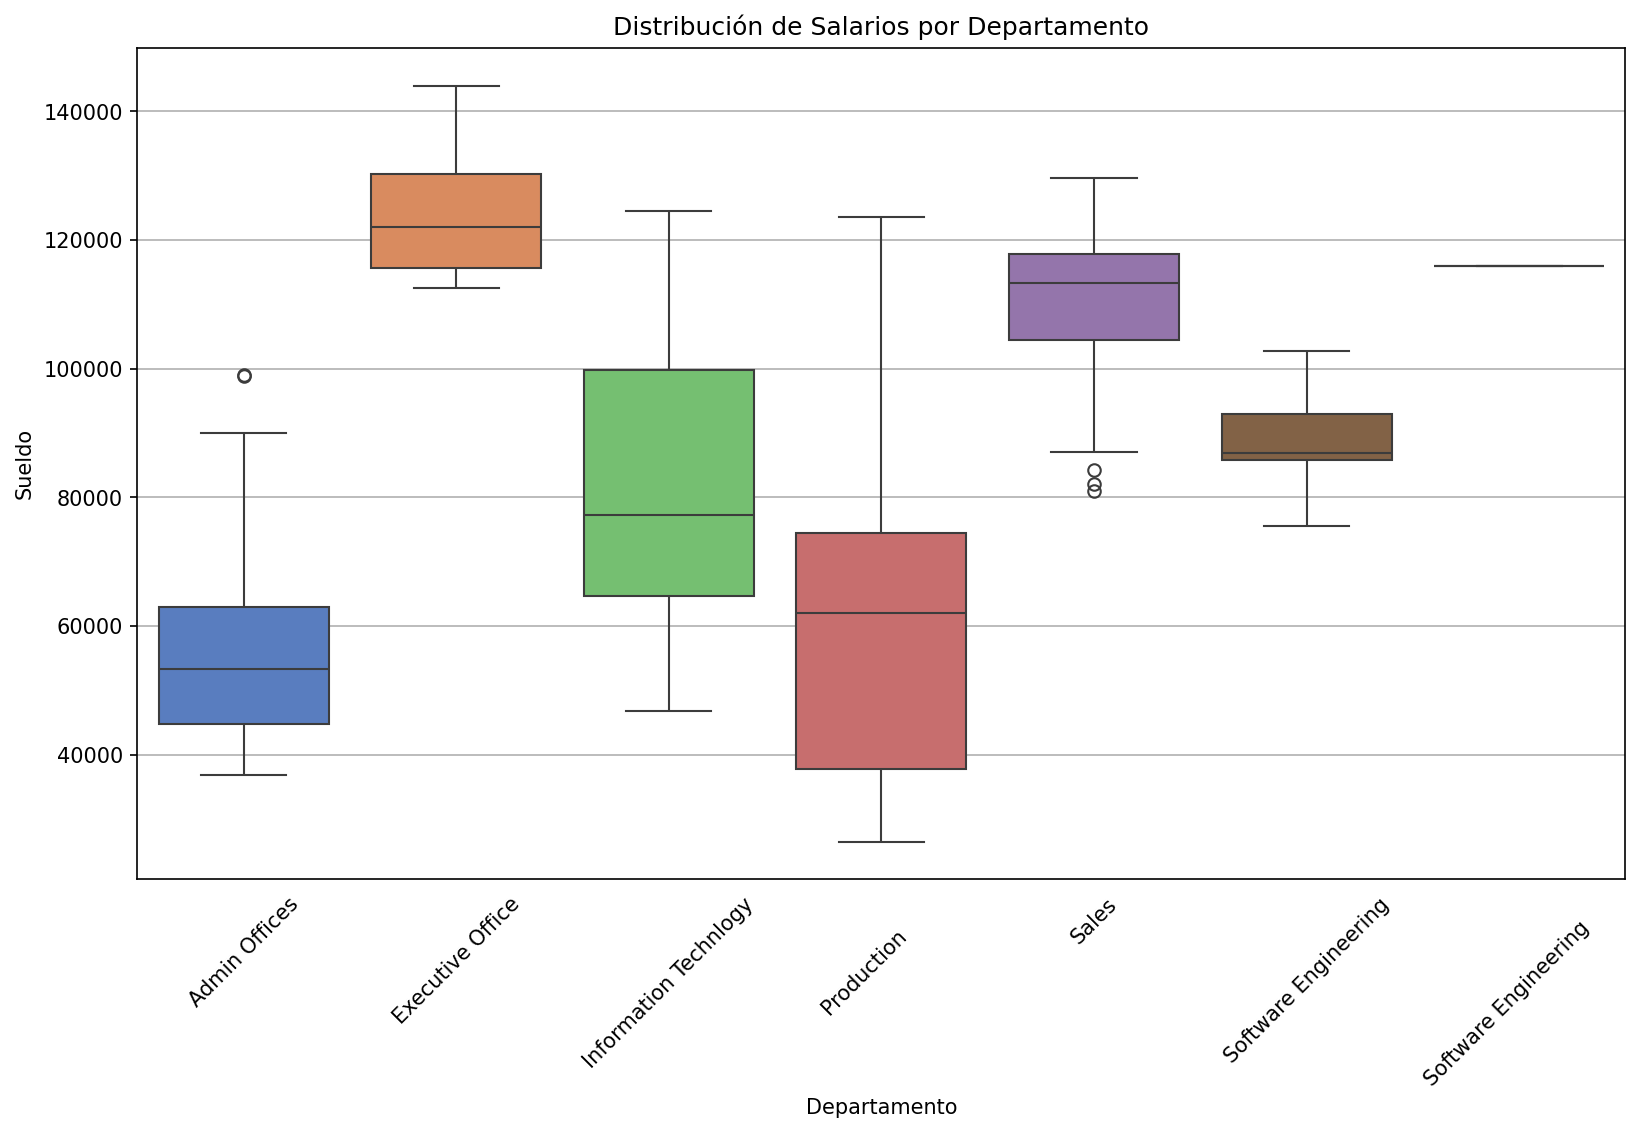

In [61]:
plt.figure(
    figsize= (12.8, 7.2),
    dpi= 150)

plt.title('Distribución de Salarios por Departamento')
plt.grid( axis = 'y')
plt.rcParams['font.family'] = 'DejaVu Sans'

salarios_dept = sns.boxplot(
    data = datos,
    x = 'Departamento',
    y = 'Sueldo',
    hue = 'Departamento',
    palette = 'muted'
)

salarios_dept.tick_params(
    axis= 'x',
    labelrotation = 45,
    bottom = False
);

<p> El departamento de Produccion (Production) posee el mas amplio rango de Salarios 

<h4> Distribución de Salarios por Genero

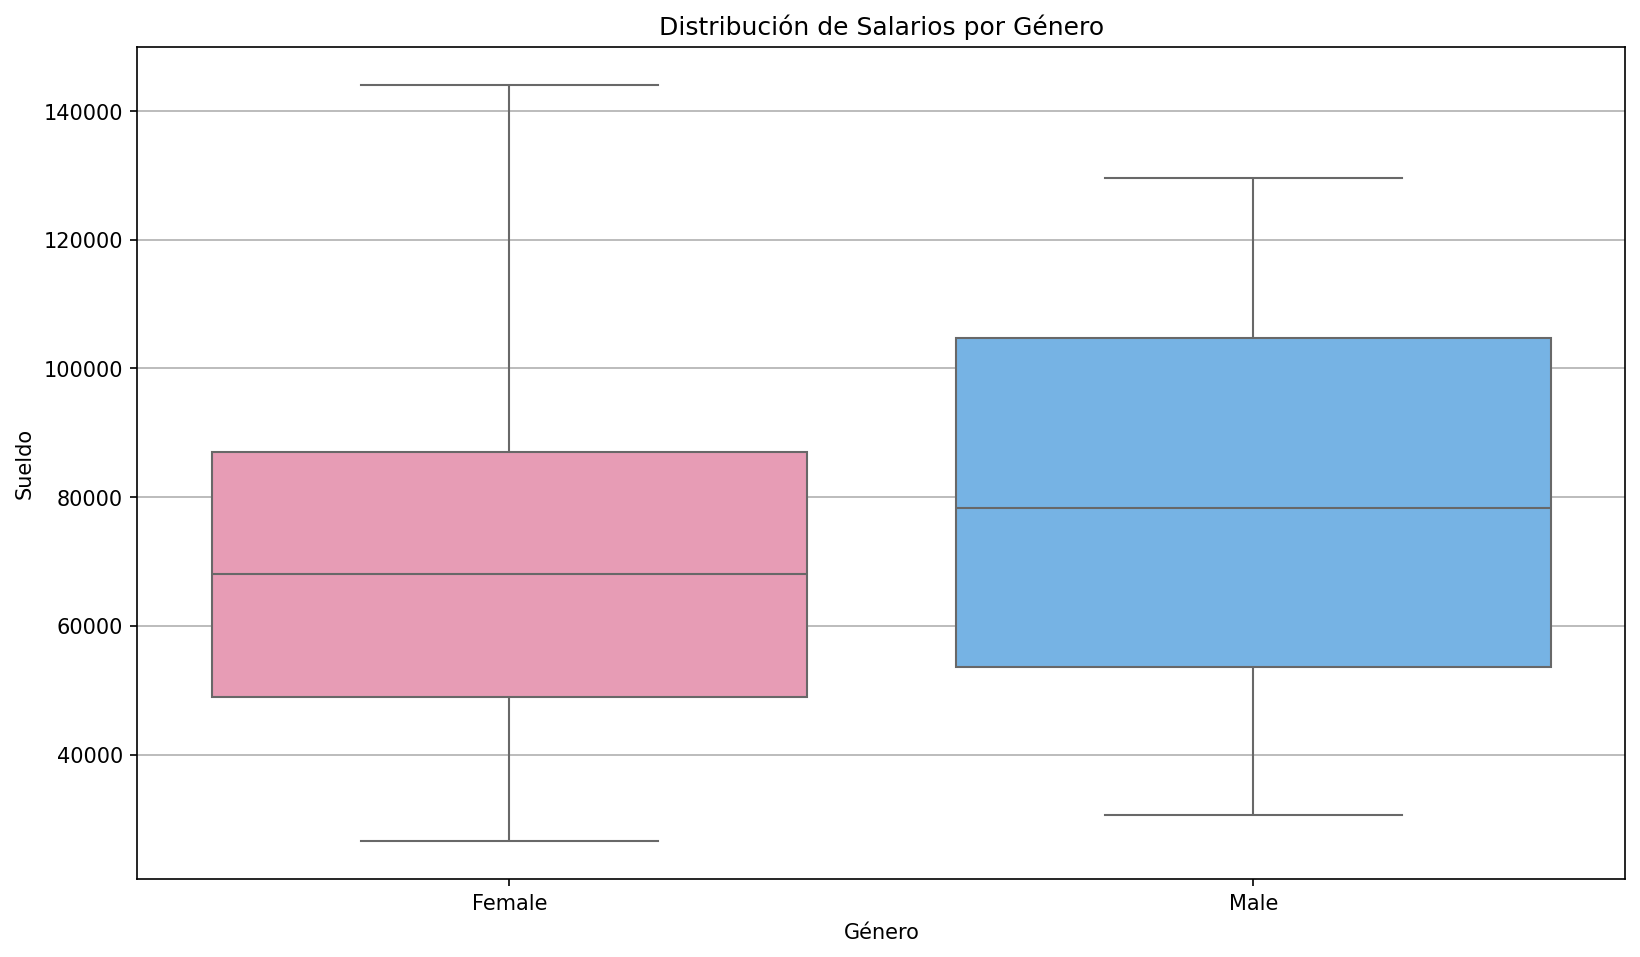

In [65]:
custom_palette = {'Female': '#f48fb1', 'Male': '#64b5f6'}



plt.figure(
    figsize= (12.8, 7.2),
    dpi= 150)

plt.grid( axis = 'y')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Distribución de Salarios por Género')

salarios_gen = sns.boxplot(
    data = datos,
    x = 'Género',
    y = 'Sueldo',
    hue = 'Género',
    palette = custom_palette
);

<p> Podemos observar que:

<li style="line-height: 1.4"> El salraio femenino es menos amplio que el masculino, sus cuartiles superiores e inferiores se encuentran mas cercanos a su mediana. También es mas amplio en cuanto a sus valores extremos inferiores y superiores.

<li style="line-height: 1.8"> El salario masculino es más amplio que el femenino (dentro de su rango interquarilico).

<li style="line-height: 1.8"> El salrio masculino se encuentra en un nivel superior al femenino, considerando su rango intercuarilico.

<li style="line-height: 1.8"> El salario femenino que se encuentra en el extremo superior de su distribución supera ampliamente al extremo superior del salario masculino.

<h4> Correlación entre  Salario y Desempeño

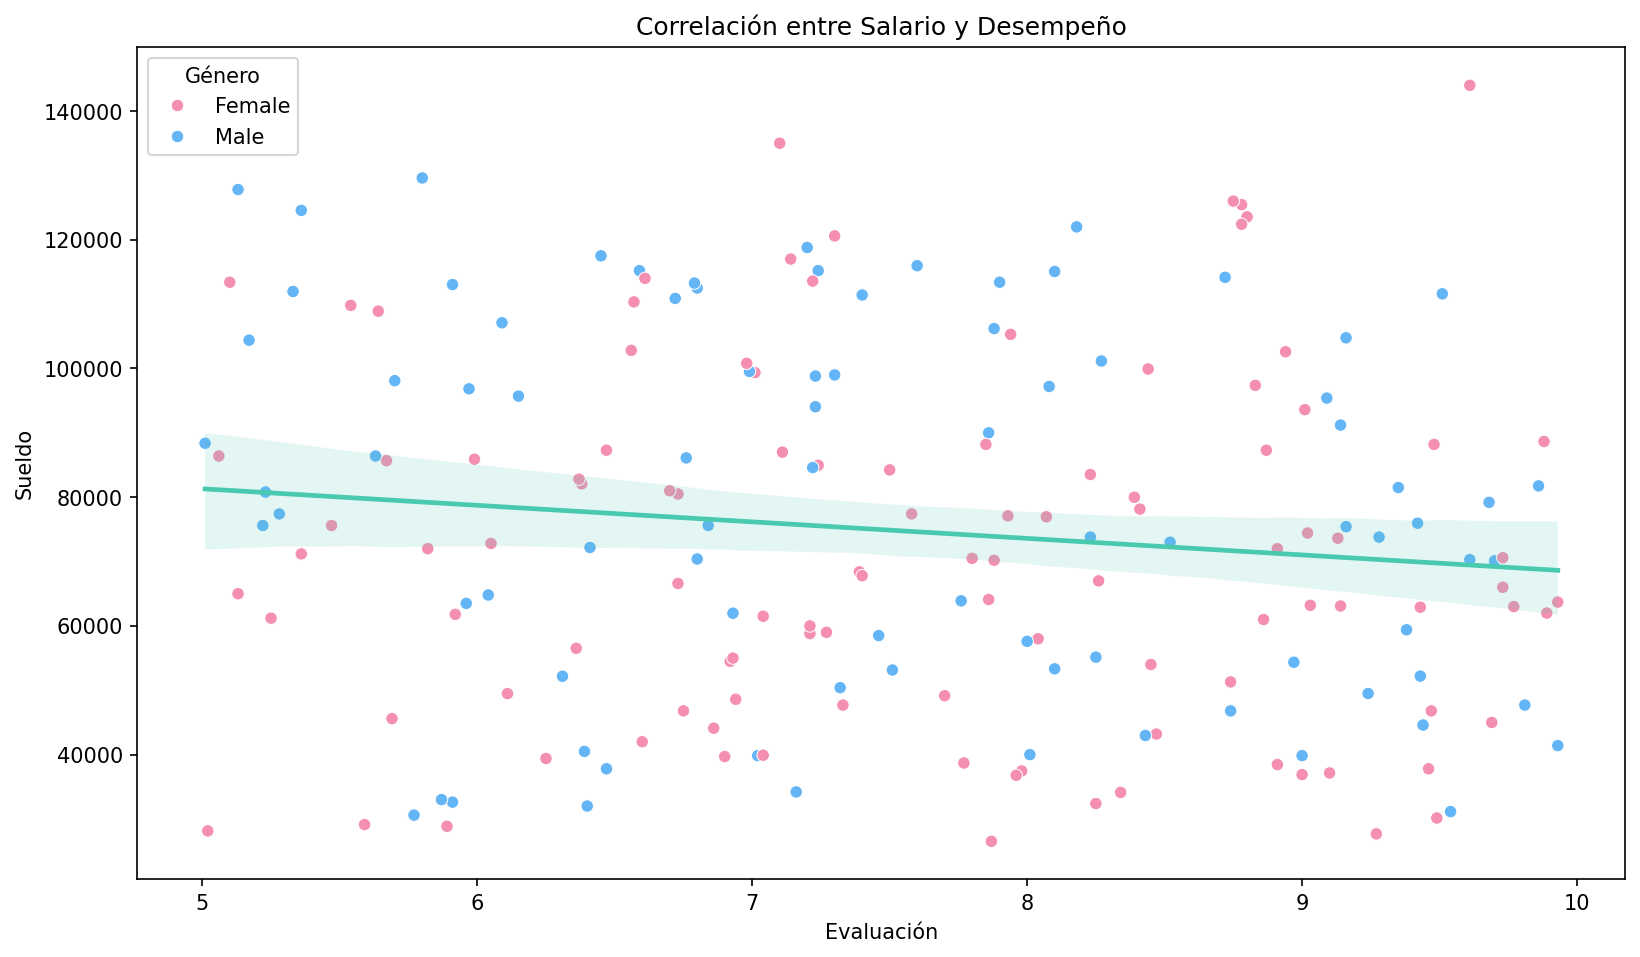

In [ ]:
# Grafico de dispersion
custom_palette = {'Female': '#f48fb1', 'Male': '#64b5f6'}

plt.figure(
    figsize= (12.8, 7.2),
    dpi= 150)

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Correlación entre Salario y Desempeño')

sns.scatterplot(
    data = datos,
    x = 'Evaluación',
    y = 'Sueldo',
    hue = 'Género',
    palette = custom_palette
)

sns.regplot(
    data = datos,
    x = 'Evaluación',
    y = 'Sueldo',
    scatter = False,
    color  = '#48c9b0'
);



<p> A partir de este gráfico podemos observar que:

<li style="line-height: 1.4"> Segun la linea de regresión, no  hay una relación positiva entre las evaluaciones de desempeño de los Empleados y su Sueldo.

<li style="line-height: 1.8"> No se observan diferencias significativas entre los patrones de dispersion entre ambos géneros

<h4> Correlación entre  Edad y Desempeño

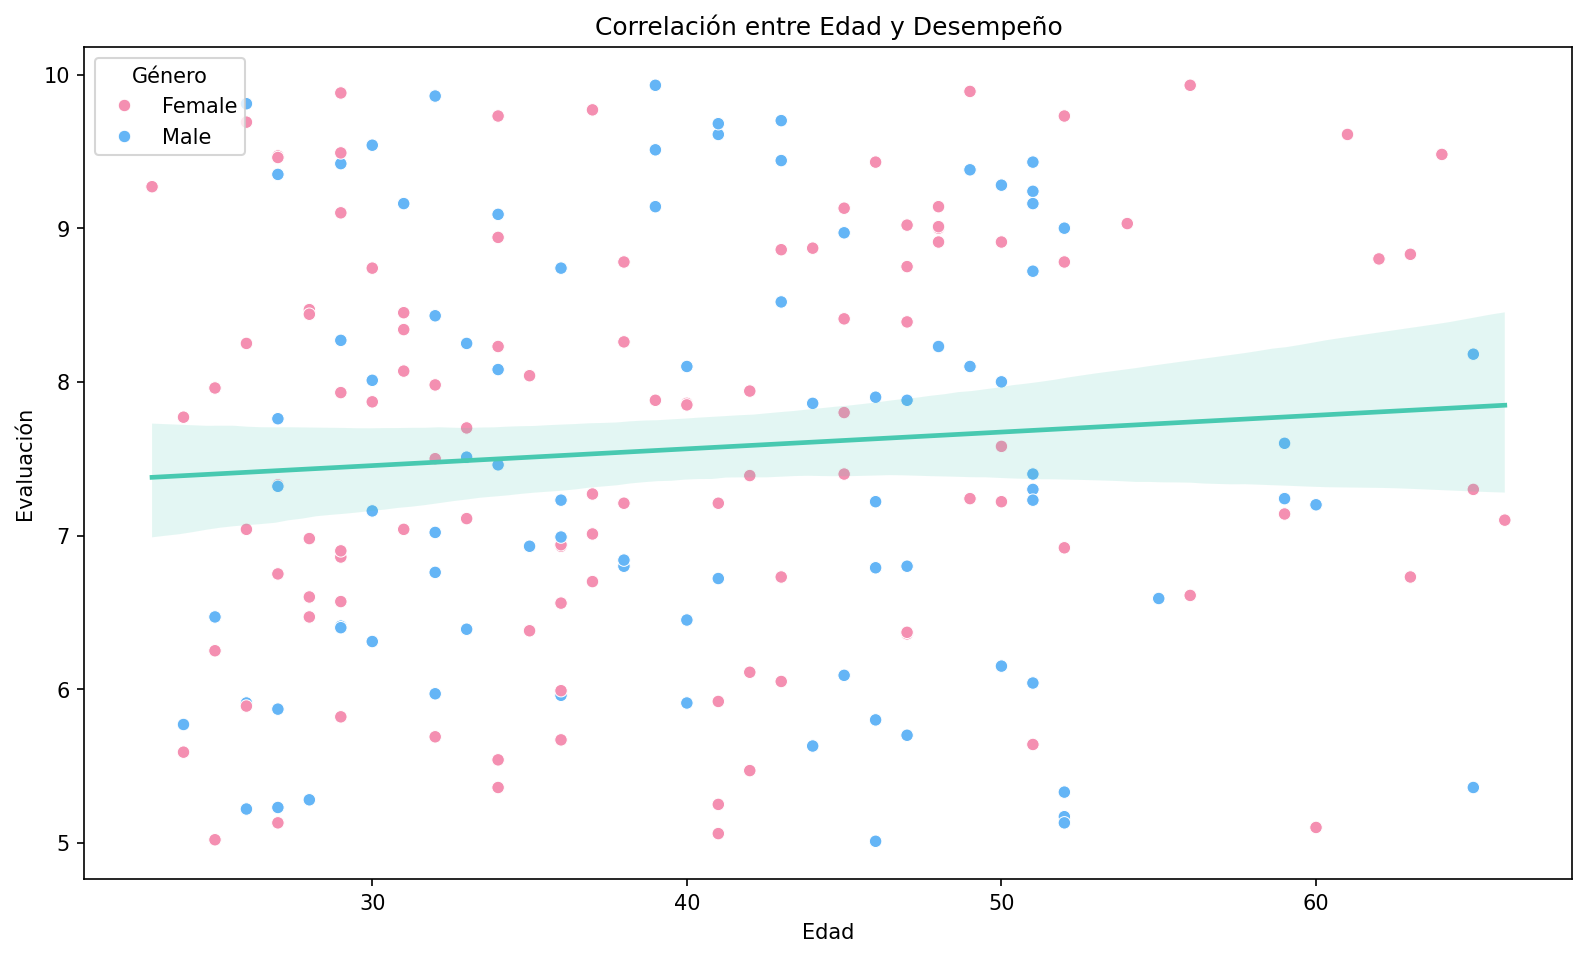

In [56]:
# Grafico de dispersion
custom_palette = {'Female': '#f48fb1', 'Male': '#64b5f6'}

plt.figure(
    figsize= (12.8, 7.2),
    dpi= 150)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Correlación entre Edad y Desempeño')

sns.scatterplot(
    data = datos,
    x = 'Edad',
    y = 'Evaluación',
    hue = 'Género',
    palette = custom_palette
)

sns.regplot(
    data = datos,
    x = 'Edad',
    y = 'Evaluación',
    scatter = False,
    color  = '#48c9b0'
);




<p> A partir de este gráfico podemos observar que:

<li style="line-height: 1.4"> Segun la linea de regresión, existe una realción positiva entre la Edad y el Desempeño.

<li style="line-height: 1.8"> No se observan diferencias significativas entre los patrones de dispersion entre ambos géneros

<h4> Matriz de correlación

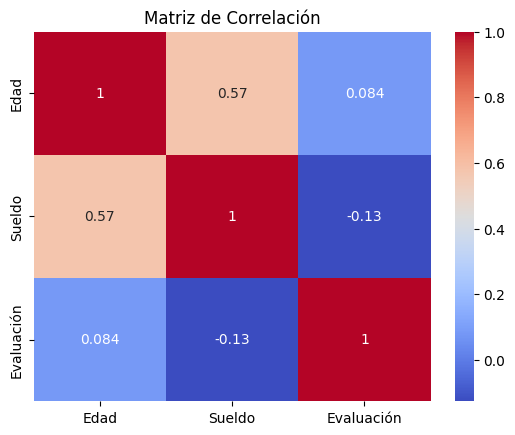

In [64]:

datos_corr = datos[['Edad','Sueldo','Evaluación']]

matriz_corr = datos_corr.corr()

plt.title('Matriz de Correlación')

sns.heatmap(
    data = matriz_corr,
    annot = True,
    cmap = 'coolwarm'
);

<p> La matriz de correlación muestra:

<li style="line-height: 1.4"> Una débil correlación entre el Salario y el Desempeño.

<li style="line-height: 1.8"> Una muy débil correlación entre la Edad del Empleado y su Desmpeño.

<li style="line-height: 1.8"> Una correlación positiva entre la Edad y el Sueldo de los Empleados.

<h4> Relación entre Edad y Salario

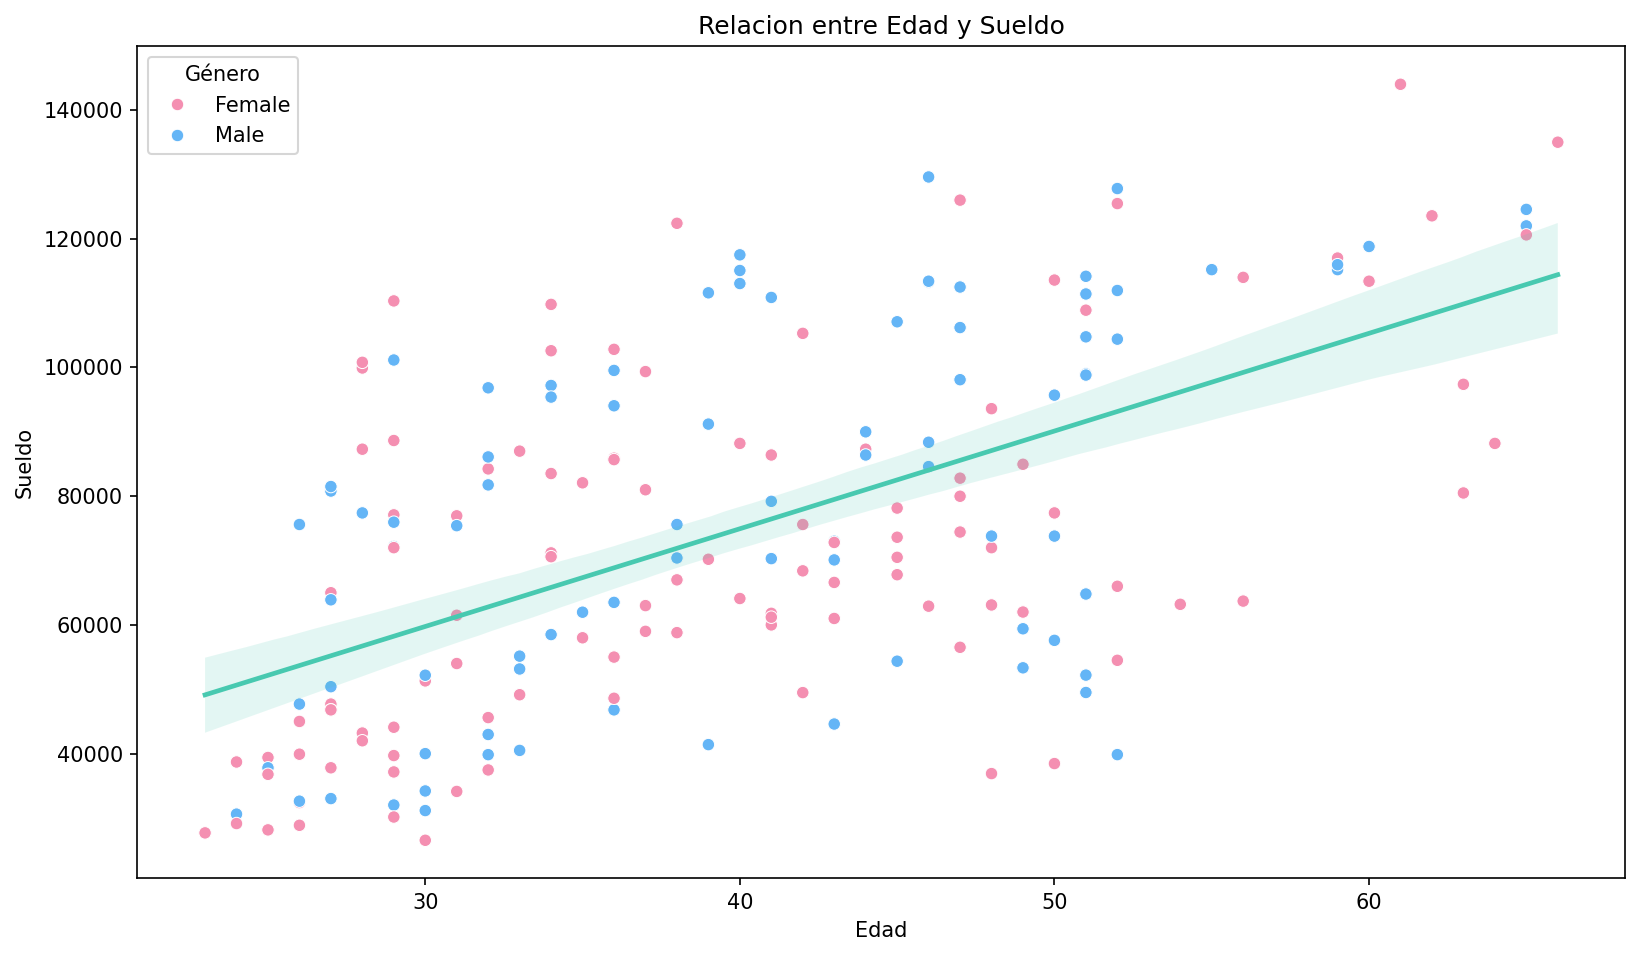

In [63]:

plt.figure(
    figsize= (12.8, 7.2),
    dpi= 150)
plt.title('Relacion entre Edad y Sueldo')

custom_palette = {'Female': '#f48fb1', 'Male': '#64b5f6'}

sns.scatterplot(
    data = datos,
    x = 'Edad',
    y = 'Sueldo',
    hue = 'Género',
    palette = custom_palette
)

sns.regplot(
    data = datos,
    x = 'Edad',
    y = 'Sueldo',
    scatter = False,
    color = '#48c9b0',
    line_kws = {'label' : 'Regresión lineal'}
);


<p> El gráfico muestra que el Salario de los Empleados aumenta en relación con su edad.
<p> Graficamente se peude observar mediante la pendiente positiva de la linea de regresión.
<p> Ésto puede ser explicado por experiencia acumulada, promociones, incrementos salariales por antigüedad.

<p> Si bien los datos muetran una relacion positiva entre Edad y Salario, es la Edad un factor predictor del Salario de un Empleado según estos mismos datos?

<h4> Analisis con aprendizaje supervisado - Regresión Lineal

In [73]:
from sklearn import linear_model

In [ ]:
# Separando variable dependiente e independiente

X = datos[['Edad']]

y = datos['Sueldo']

In [74]:
# Creando modelo lineal

model = linear_model.LinearRegression()

In [75]:
# Entrenando el modelo lineal

model.fit(X,y)

LinearRegression()

In [78]:
# Calculando y evaluando el coeficiente de determinacion R^2

r_sqr = model.score(X,y)

r_sqr = round(r_sqr, 4)

print(f'Coeficiente de determinacion (R^2) para la Edad como predictor del Salrio: {r_sqr}')

Coeficiente de determinacion (R^2) para la Edad como predictor del Salrio: 0.3298


<p> Si bien la Edad tiene una correlación moderada con el Salario, ella no es un fuerte predictor del Salario por sí misma.